Accuracy: 1.0

Confusion Matrix:
 [[8 0 0]
 [0 5 0]
 [0 0 7]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00         5
   virginica       1.00      1.00      1.00         7

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



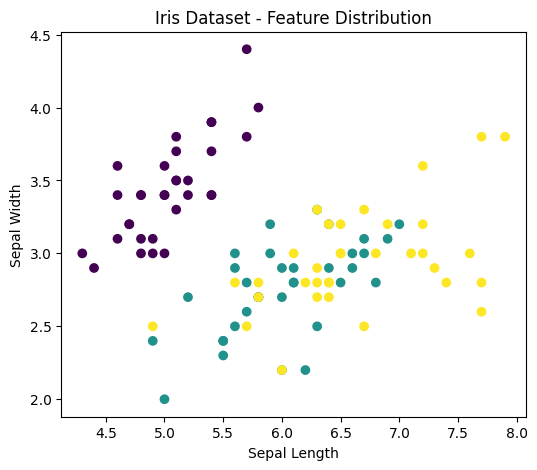

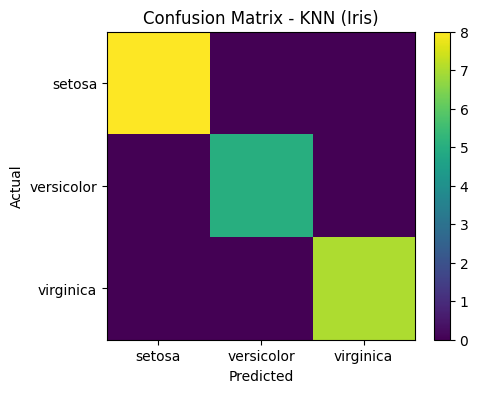

In [2]:
# KNN on IRIS Dataset with Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
data = pd.read_csv("IRIS_dataset.csv")

# Features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# KNN Model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ---------------- VISUALIZATION 1 ----------------
# Scatter Plot (First Two Features)

plt.figure(figsize=(6,5))
plt.scatter(X[:,0], X[:,1], c=pd.factorize(y)[0])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Iris Dataset - Feature Distribution")
plt.show()

# ---------------- VISUALIZATION 2 ----------------
# Confusion Matrix Heatmap

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
plt.imshow(cm)
plt.title("Confusion Matrix - KNN (Iris)")
plt.colorbar()
plt.xticks(np.arange(len(np.unique(y))), np.unique(y))
plt.yticks(np.arange(len(np.unique(y))), np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
